<a href="https://colab.research.google.com/github/pyeonghwagongwon/insole-pj/blob/main/Foot_Pressure_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Data_Left_2023-07-13_162613.txt to Data_Left_2023-07-13_162613.txt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving Data_Right_2023-07-13_162614.txt to Data_Right_2023-07-13_162614.txt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


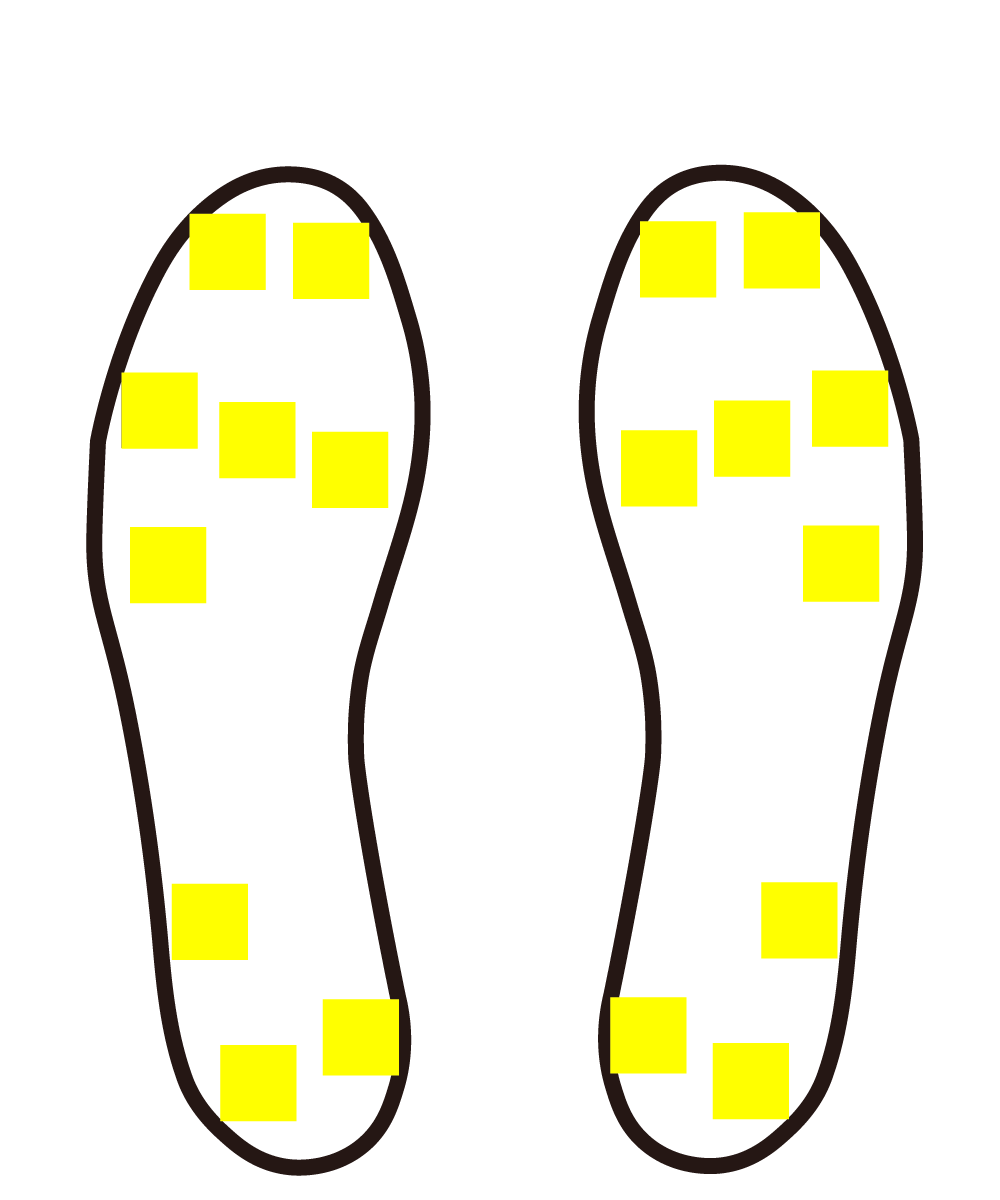

In [1]:
import datetime
from google.colab import files
import csv
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import base64
import requests


def remove_special_characters(text):
    cleaned_text = ''.join(char for char in text if char.isprintable())
    return cleaned_text

def process_txt_file():
    uploaded_files = files.upload()  # Upload the .txt file
    filename = list(uploaded_files.keys())[0]  # Get the uploaded filename

    # Read the content of the file
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Remove the first line
    lines = lines[1:]

    content = ''.join(lines)  # Join the remaining lines into a single string
    content = content.replace('\n', '')  # Remove all line breaks
    lines = content.split('data=')  # Split the content based on 'data='

    data_rows = []  # List to store transformed data

    for line in lines:
        if line:  # Only process non-empty lines
            processed_line = line.replace('data=', '')  # Remove 'data='
            cleaned_line = remove_special_characters(processed_line)  # Remove special characters
            data_list = cleaned_line.split(',')  # Split by ','

            # Skip if there are empty values
            if '' in data_list:
                continue

            seconds = int(data_list[-1])  # Convert the last element to an integer and store it in seconds variable
            data_list = [int(val.strip("'")) for val in data_list[:-1]]  # Convert other elements to integers and remove single quotes

            # Add 0 to empty parts
            while len(data_list) < 8:
                data_list.append(0)

            data_list.insert(0, seconds)  # Add seconds as the first element
            data_rows.append(data_list)  # Add the transformed data to the list

    # Save as .csv file
    current_date = datetime.datetime.now().strftime("%y%m%d")
    output_filename = f'transformed_data_{current_date}.csv'
    with open(output_filename, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(['Time', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9'])  # Write the header
        writer.writerows(data_rows)  # Write the data

    return output_filename

# Example usage
transformed_file = process_txt_file()

# .csv 파일 로드
df = pd.read_csv(transformed_file)

# loc1부터 loc9까지의 열을 변형
for i in range(1, 10):
    x = df['L' + str(i)]  # 수정: 열 이름 변경
    y = 4.845 * np.exp(-x / -407.1) + 49.826
    df['L' + str(i)] = y  # 수정: 열 이름 변경

# 54.671 값을 가진 나머지 부분을 공백으로 처리
df.loc[:, 'L1':'L9'] = df.loc[:, 'L1':'L9'].where(df.loc[:, 'L1':'L9'] != 54.671, np.nan)

# 변형된 DataFrame을 새로운 .csv 파일로 저장
current_date = datetime.datetime.now().strftime("%y%m%d")
left_file = f'Left_Signal_{current_date}.csv'
df.to_csv(left_file, index=False)

# 변형된 파일을 로컬로 다운로드
files.download(left_file)

def process_txt_file():
    uploaded_files = files.upload()  # Upload the .txt file
    filename = list(uploaded_files.keys())[0]  # Get the uploaded filename

    # Read the content of the file
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Remove the first line
    lines = lines[1:]

    content = ''.join(lines)  # Join the remaining lines into a single string
    content = content.replace('\n', '')  # Remove all line breaks
    lines = content.split('data=')  # Split the content based on 'data='

    data_rows = []  # List to store transformed data

    for line in lines:
        if line:  # Only process non-empty lines
            processed_line = line.replace('data=', '')  # Remove 'data='
            cleaned_line = remove_special_characters(processed_line)  # Remove special characters
            data_list = cleaned_line.split(',')  # Split by ','

            # Skip if there are empty values
            if '' in data_list:
                continue

            seconds = int(data_list[-1])  # Convert the last element to an integer and store it in seconds variable
            data_list = [int(val.strip("'")) for val in data_list[:-1]]  # Convert other elements to integers and remove single quotes

            # Add 0 to empty parts
            while len(data_list) < 8:
                data_list.append(0)

            data_list.insert(0, seconds)  # Add seconds as the first element
            data_rows.append(data_list)  # Add the transformed data to the list

    # Save as .csv file
    current_date = datetime.datetime.now().strftime("%y%m%d")
    output_filename = f'transformed_data_{current_date}.csv'
    with open(output_filename, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(['Time', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9'])  # Write the header
        writer.writerows(data_rows)  # Write the data

    return output_filename

# Example usage
transformed_file = process_txt_file()

# .csv 파일 로드
df = pd.read_csv(transformed_file)

# loc1부터 loc9까지의 열을 변형
for i in range(1, 10):
    x = df['R' + str(i)]  # 수정: 열 이름 변경
    y = 4.845 * np.exp(-x / -407.1) + 49.826
    df['R' + str(i)] = y  # 수정: 열 이름 변경

# 54.671 값을 가진 나머지 부분을 공백으로 처리
df.loc[:, 'R1':'R9'] = df.loc[:, 'R1':'R9'].where(df.loc[:, 'R1':'R9'] != 54.671, np.nan)


# 변형된 DataFrame을 새로운 .csv 파일로 저장
current_date = datetime.datetime.now().strftime("%y%m%d")
right_file = f'Right_Signal_{current_date}.csv'
df.to_csv(right_file, index=False)

# 변형된 파일을 로컬로 다운로드
files.download(right_file)

# left.csv 파일 로드
left_df = pd.read_csv(f'Left_Signal_{current_date}.csv')

# right.csv 파일 로드
right_df = pd.read_csv(f'Right_Signal_{current_date}.csv')

# 새로운 DataFrame 생성
new_columns = ['Time', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9']
new_df = pd.DataFrame(columns=new_columns)

# 시간 열 추가
new_df['Time'] = left_df['Time']

# 위치1부터 위치9까지의 값을 대입
for i in range(1, 10):
    new_df['L' + str(i)] = left_df['L' + str(i)]
    new_df['R' + str(i)] = right_df['R' + str(i)]

# 새로운 .csv 파일로 저장
combined_file = f'Combined_Data_{current_date}.csv'
new_df.to_csv(combined_file, index=False)

# 새로운 파일을 로컬로 다운로드
files.download(combined_file)
# CSV 파일 읽기
df = pd.read_csv(combined_file)

# 데이터 형태 변환
df = df.melt(id_vars='Time', var_name='loc', value_name='Pressure')

# 'Pressure' 열을 실수형(float)으로 변환
df['Pressure'] = pd.to_numeric(df['Pressure'], errors='coerce')

# 정수형으로 변환
df['Time'] = df['Time'].astype(int)

# 압력값이 0인 값을 NaN으로 대체
df['Pressure'] = df['Pressure'].replace(0, float('nan'))

# NaN 값을 0으로 대체
df['Pressure'] = df['Pressure'].fillna(0)

# 정수형으로 변환
df['Pressure'] = df['Pressure'].astype(int)

# 압력값이 0인 행 삭제
df = df[df['Pressure'] != 0]

# 데이터를 시간(Time) 순으로 정렬
df = df.sort_values('Time')





################################################


# 위치 좌표 설정
locations = {
    'L1': (-84, 80),
    'L2': (-144, 45),
    'L3': (-173, 165),
    'L4': (-89, 494),
    'L5': (-145, 518),
    'L6': (-198, 427),
    'L7': (-101, 648),
    'L8': (-163, 656),
    'L9': (-203, 538),
    'R1': (89, 81),
    'R2': (150, 48),
    'R3': (179, 164),
    'R4': (95, 496),
    'R5': (150, 519),
    'R6': (203, 426),
    'R7': (105, 650),
    'R8': (166, 658),
    'R9': (209, 541)
}


# 그래프 생성
fig1 = px.scatter(df, x=[locations.get(loc, (0, 0))[0] for loc in df['loc']],
                  y=[locations.get(loc, (0, 0))[1] for loc in df['loc']],
                  animation_frame='Time', hover_name='loc',
                  range_x=[-500, 500], range_y=[0, 800], title='Foot Pressure Sensing',
                  color='Pressure', color_continuous_scale=[[0, 'rgb(255, 255, 0)'], [1, 'rgb(255, 0, 0)']],
                  range_color=[0, 1000],  # 범위 설정
                  text='Pressure',
                  width=1000, height=800)

# 각 애니메이션 프레임에 대해 마커 모양 설정
for frame in fig1.frames:
    frame.data[0].marker.symbol = 'square'
    frame.data[0].marker.size = 37

# 이미지 파일 로드
image_filename = 'https://raw.githubusercontent.com/pyeonghwagongwon/insole-pj/main/insolegroupyay1.png'
image_data = base64.b64encode(requests.get(image_filename).content).decode('utf-8')

# 이미지 배경 설정
fig1.update_layout(images=[
    dict(
        source='data:image/png;base64,{}'.format(image_data),
        xref="paper", yref="paper",
        x=0.5, y=0.5,
        sizex=1.1, sizey=1.1,
        xanchor="center",
        yanchor="middle",
        opacity=0.99,
        layer="below")])


# 이미지 배경 설정
fig1.update_layout(images=[
    dict(
        source='data:image/png;base64,{}'.format(image_data),
        xref="paper", yref="paper",
        x=0.5, y=0.5,
        sizex=1.1, sizey=1.1,
        xanchor="center",
        yanchor="middle",
        opacity=0.99,
        layer="below")])



# 그래프 레이아웃 설정
layout = go.Layout(
    title=dict(
        text='Foot Pressure Sensing',
        x=0.5,  # 가운데 정렬
        xanchor='center',
        font=dict(size=18)  # 제목 폰트 크기
    ),
    xaxis=dict(
        title='',
        showticklabels=False,
        zeroline=False,
        showgrid=False # x축 라벨 제거
    ),
    yaxis=dict(
        title='',
        showticklabels=False,
        zeroline=False# y축 라벨 제거
    ),
    plot_bgcolor='rgba(0, 0, 0, 0)',  # 배경 투명하게 설정,
    updatemenus=[
        dict(
            type='buttons',
            buttons=[
                dict(
                    method='animate',
                    args=[None, {
                        'frame': {'duration': 1000, 'redraw': False},  # Set duration to 0 to disable animation
                        'fromcurrent': True,
                        'transition': {'duration': 0}  # Set duration to 0 to disable transition
                    }],
                    label='Play',  # Label for the play button
                ),
                dict(
                    method='animate',
                    args=[[], {  # Empty list to stop the animation
                        'frame': {'duration': 0, 'redraw': False},  # Set duration to 0 to disable animation
                        'mode': 'immediate',
                        'transition': {'duration': 0}  # Set duration to 0 to disable transition
                    }],
                    label='Stop',  # Label for the stop button
                ),
            ],
        ),
    ])


# 그래프 플롯
fig1.update_layout(layout)
fig1.layout['coloraxis']['colorbar']['title']['text'] = 'Pressure(kPa)'
fig1.update_layout(coloraxis_colorbar=dict(
    title_font=dict(size=13),
    yanchor="middle"
))

# 타이틀 위치 조정
fig1.update_layout(title=dict(y=0.85, yanchor='middle'))

# 그래프 크기 조정
fig1.update_layout(width=1000, height=760,xaxis=dict(showgrid=False), yaxis=dict(showgrid=False))

# 그래프 표시
fig1.show()